In [1]:
import main
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

os.system('pip3 install -r ../requirements.txt')

  Created wheel for mysql-connector-repackaged: filename=mysql_connector_repackaged-0.3.1-py3-none-any.whl size=44728 sha256=203aec8ed76d0e5bd97752e7f8f9fe15c88db71cf5cf59b4456bfe2fbf3da587
  Stored in directory: /home/vitor/.cache/pip/wheels/bc/df/e1/b2b790a9e8e1f5daf678ef5a65cbb75c683862b27d0b984464
Successfully built mysql-connector-repackaged


0


 Reading data... 


 FINISH !!! 


 Número de Clientes: 1100649

 Número de Vendas: 1599828

 Média de compra: 26663800.033289477

 Total faturamento: 159982800.19973686

 Categorias vendidas: 10

 Nicho atendido: 25

 Número de produtos: 17883

 Número de compra por cliente: 1.4535315073197723

 Número de gasto por cliente: 145.35315091344913

 Dispositivo de compra: 5

 Inicio: 2016-01-01 00:00:27 -> Fim: 2016-06-30 23:59:57


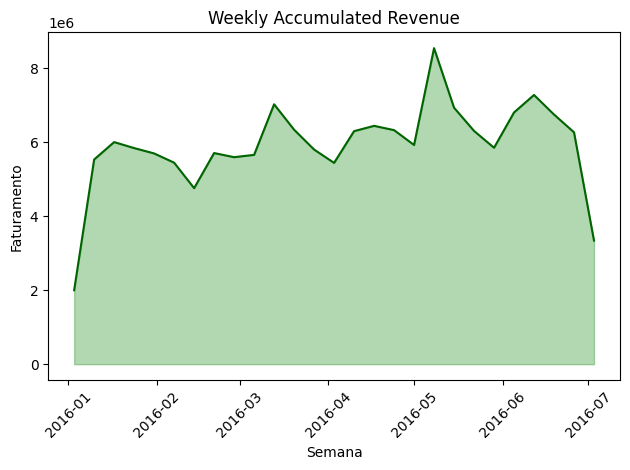

In [37]:
rd = main.read_data()

desvio_padrao = 10
media = 100

print('\n Número de Clientes: {}'.format(len(rd.df['buyer_id'].value_counts().index)))
print('\n Número de Vendas: {}'.format(len(rd.df)))
faturamento = (rd.df['purchase_value'].to_numpy(dtype=float) * desvio_padrao) + 100
print('\n Média de compra: {}'.format(faturamento.sum()/6))
print('\n Total faturamento: {}'.format(faturamento.sum()))
print('\n Categorias vendidas: {}'.format(len(rd.df['product_category'].value_counts().index)))
print('\n Nicho atendido: {}'.format(len(rd.df['product_niche'].value_counts().index)))
print('\n Número de produtos: {}'.format(len(rd.df['product_id'].value_counts().index)))
print('\n Número de compra por cliente: {}'.format((len(rd.df))/len(rd.df['buyer_id'].value_counts().index)))
print('\n Número de gasto por cliente: {}'.format(faturamento.sum()/len(rd.df['buyer_id'].value_counts().index)))
print('\n Dispositivo de compra: {}'.format(len(rd.df['purchase_device'].value_counts().index)))
print('\n Inicio: {} -> Fim: {}'.format(min(rd.df['purchase_date'].value_counts().index),max(rd.df['purchase_date'].value_counts().index)))

df_aux = rd.df
df_aux['purchase_value'] = (df_aux['purchase_value'] * 10) + 100

df_aux['purchase_date'] = pd.to_datetime(rd.df['purchase_date'])

weekly_revenue = df_aux.resample('W', on='purchase_date')['purchase_value'].sum()

cumulative_revenue = weekly_revenue

fig, ax = plt.subplots()
ax.plot(cumulative_revenue.index, cumulative_revenue, color='darkgreen')
ax.fill_between(cumulative_revenue.index, cumulative_revenue, color='green', alpha=0.3)

plt.xticks(rotation=45)
plt.xlabel('Semana')
plt.ylabel('Faturamento')
plt.title('Weekly Accumulated Revenue')
plt.tight_layout()
plt.show()

/home/vitor/Área de Trabalho/Vitor/sales_hot/sales_hot/main.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_data['purchase_value'] = (sell_data['purchase_value'] * desvio_padrao) + media
100%|██████████| 10/10 [00:00<00:00, 225.74it/s]
/home/vitor/Área de Trabalho/Vitor/sales_hot/sales_hot/main.py:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x, rotation='vertical',fontsize=6)
/home/vitor/Área de Trabalho/Vitor/sales_hot/sales_hot/main.py:100: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x, rotation='vertical',fontsize=6)


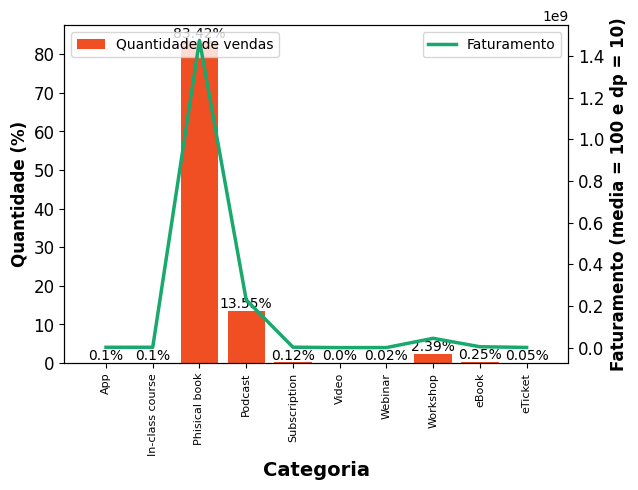

100%|██████████| 25/25 [00:00<00:00, 338.64it/s]
/home/vitor/Área de Trabalho/Vitor/sales_hot/sales_hot/main.py:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x, rotation='vertical',fontsize=6)
/home/vitor/Área de Trabalho/Vitor/sales_hot/sales_hot/main.py:100: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x, rotation='vertical',fontsize=6)


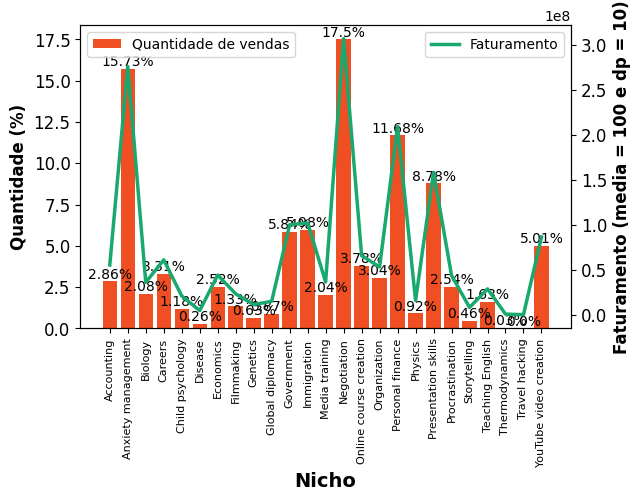

In [38]:
df_product_category_value, df_product_niche_value = rd.val_faturation()

/home/vitor/Área de Trabalho/Vitor/sales_hot/sales_hot/main.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cliente['purchase_date'] = pd.to_datetime(df_cliente['purchase_date'])
/home/vitor/Área de Trabalho/Vitor/sales_hot/sales_hot/main.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cliente['purchase_value'] = (df_cliente['purchase_value'] * desvio_padrao) + media
100%|██████████| 1100649/1100649 [00:42<00:00, 25770.58it/s]


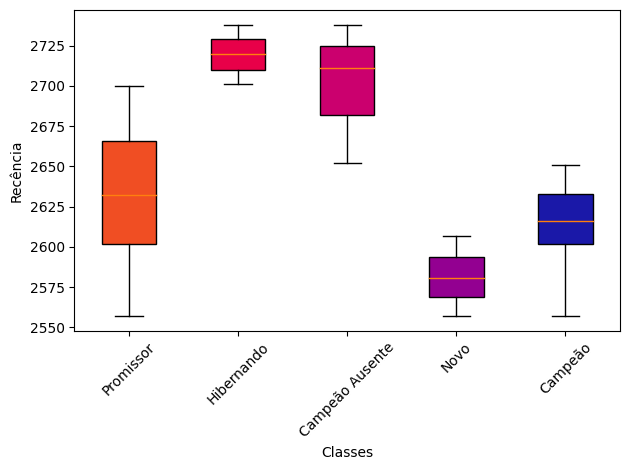

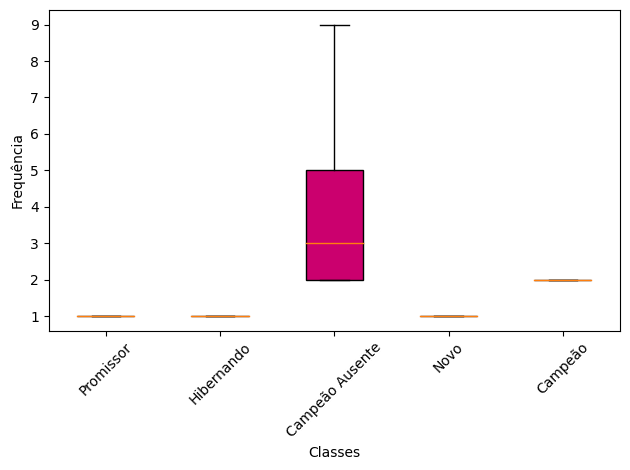

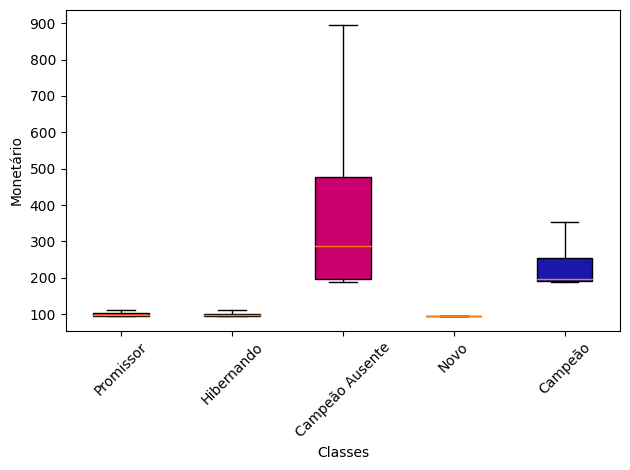

Finish segmentation


Promissor          55.677968
Hibernando         16.171005
Campeão Ausente    13.952404
Novo                7.411718
Campeão             6.786905
Name: RFM_class, dtype: float64

In [39]:
rd.seg_client()
rd.RFM_segment['RFM_class'].value_counts(normalize=True).mul(100)

*** Absolute number from product_category: 1599828***


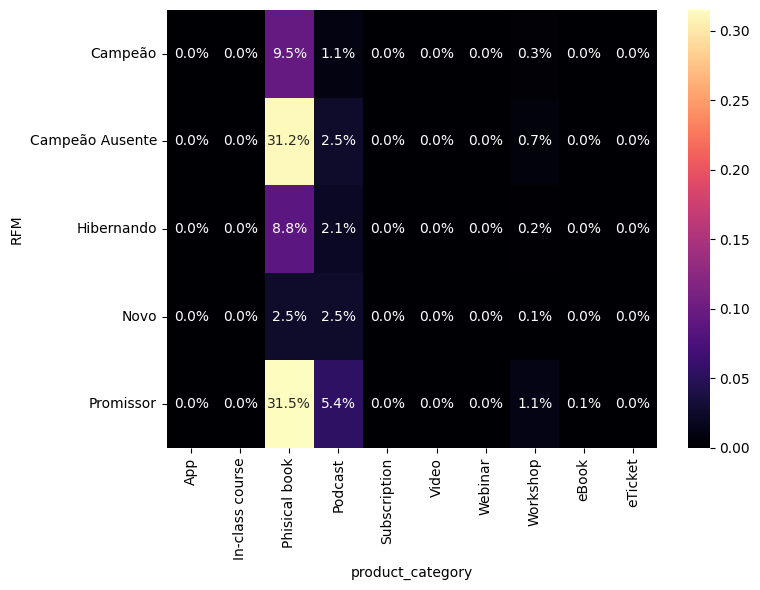

*** Absolute number from product_niche: 1599828***


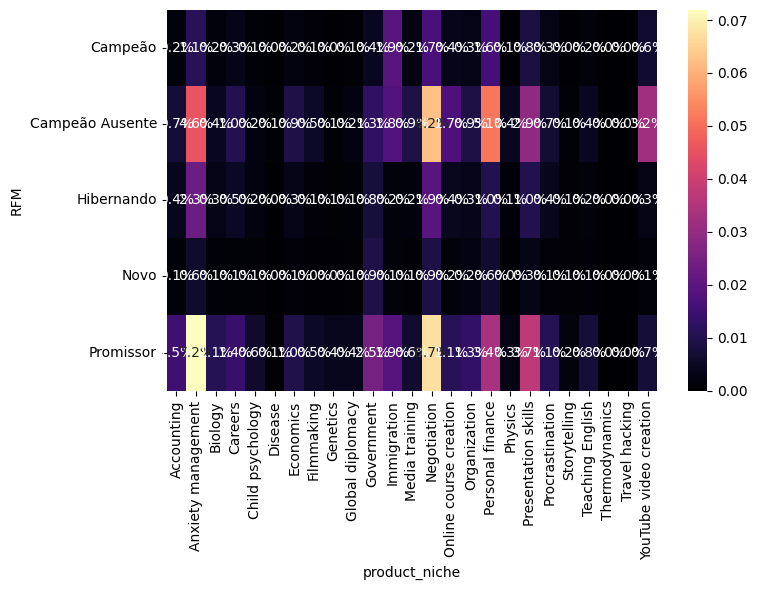

*** Absolute number from purchase_device: 1599828***


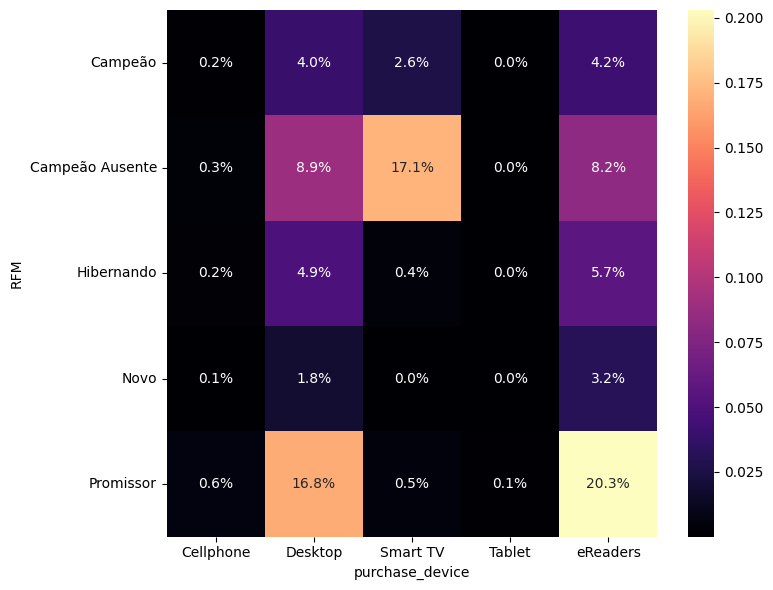

In [40]:
rd.seg_prod()

/home/vitor/Área de Trabalho/Vitor/sales_hot/sales_hot/main.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_numeric['affiliate_commission_percentual'] = X_numeric['affiliate_commission_percentual'] / 100


Selected Features:
product_category_Phisical book
product_category_Podcast
product_niche_Anxiety management
product_niche_Negotiation
product_niche_Personal finance
purchase_device_Desktop
purchase_device_Smart TV
purchase_device_eReaders
purchase_value


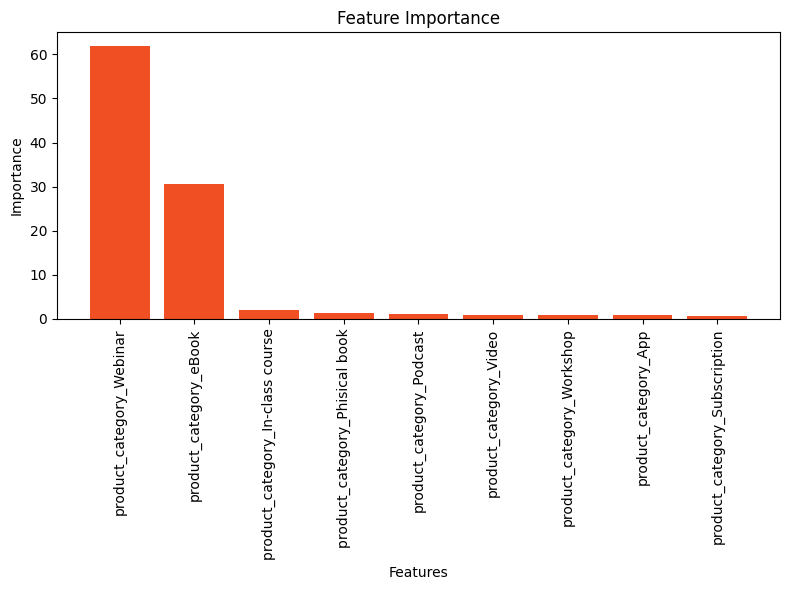

Finish


In [41]:
rd.feature_analysis()